

# Biblioteki, stałe i funkcje

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol,sympify,Derivative,exp
from sympy.series import series
from sympy.utilities.lambdify import lambdify
import math

In [2]:
golden_ratio = (1 + math.sqrt(5)) / 2 #1,618..

In [3]:
x = Symbol('x') 
base_function = sympify((x-2)**2-8)
base_function_deriv = Derivative(base_function,x).doit()
base_function_deriv2 = Derivative(base_function,x,2).doit()
starting_point = 10

In [4]:
base_function_deriv

2*x - 4

In [5]:
def substitute_x(function,value_of_x):
    result=function.subs(x,value_of_x).evalf()
    return result

In [6]:
substitute_x(base_function_deriv,2)

0

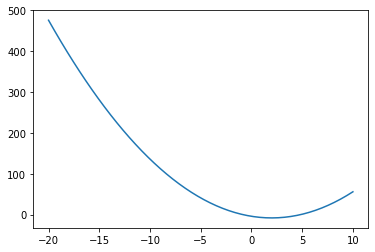

In [7]:
vectorized_function=np.vectorize(substitute_x)
z=np.linspace(-20,10)
w=vectorized_function(base_function,z)
plt.plot(z, w)
plt.show()

# Procedura wyszukiwania przedziału zawierającego minimum dla funkcji unimodalnej (bracketing)

In [8]:
def bracket_minimum(function,starting_point):
    
    step_size = 1
    expansion_factor = 2.0
    
    a=starting_point
    ya=substitute_x(function,a)
    b=a+step_size
    yb=substitute_x(function,b) 
    
    print("Starting at point {}. Taking step of size {}".format(a,step_size))
    
    if yb>ya:
        print('After taking step {} from {}, the function value increased. Reversing direction'.format(step_size,starting_point))
        step_size=-1*step_size
        b=a+step_size
        yb=substitute_x(function,b) 
    
    print("Point a, x={} has higher function value, equal to {}".format(a,ya))
    print("Point b, x={} has lower function value, equal to {}".format(b,yb))
    
    point_coordinates=np.array([a,b,0,ya,yb,0]) 
    
    while True: 
        
        c,yc=b+step_size,substitute_x(function,b+step_size)
        
        print("Created point c={} by taking step size {} from point b={}".format(c,step_size,b))
        print("Function value at 'new' point c is equal {}".format(yc))
        
        if yc > yb and a<c:
            
            final_bracket = (a,c)
            point_coordinates=np.vstack([point_coordinates,np.array([a,b,c,ya,yb,yc])])
            print("Function value started to increase. The final bracket is equal to [{},{}]".format(a,c))
            
            return point_coordinates
        
        if yc > yb and a>=c:
            
            final_bracket = (c, a)
            point_coordinates=np.vstack([point_coordinates,np.array([a,b,c,ya,yb,yc])])
            print("Function value started to increase. The final bracket is equal to [{},{}]".format(c,a))
            
            return point_coordinates
        
        point_coordinates=np.vstack([point_coordinates,np.array([a,b,c,ya,yb,yc])])
        
        a,ya,b,yb=b,yb,c,yc 
        print("Updating values. Point a takes values of b, point b takes values of c")
        step_size=step_size*expansion_factor

In [9]:
initial_bracket_results=bracket_minimum(base_function,starting_point)
final_bracket=np.array([[initial_bracket_results[-1][0]],[initial_bracket_results[-1][2]]])

Starting at point 10. Taking step of size 1
After taking step 1 from 10, the function value increased. Reversing direction
Point a, x=10 has higher function value, equal to 56.0000000000000
Point b, x=9 has lower function value, equal to 41.0000000000000
Created point c=8 by taking step size -1 from point b=9
Function value at 'new' point c is equal 28.0000000000000
Updating values. Point a takes values of b, point b takes values of c
Created point c=6.0 by taking step size -2.0 from point b=8
Function value at 'new' point c is equal 8.00000000000000
Updating values. Point a takes values of b, point b takes values of c
Created point c=2.0 by taking step size -4.0 from point b=6.0
Function value at 'new' point c is equal -8.00000000000000
Updating values. Point a takes values of b, point b takes values of c
Created point c=-6.0 by taking step size -8.0 from point b=2.0
Function value at 'new' point c is equal 56.0000000000000
Function value started to increase. The final bracket is equa

In [10]:
def draw_iteration_bracketing(function_input,result,n):
    vectorized_function=np.vectorize(substitute_x)
    z=np.linspace(np.min(result[:,0:3]),np.max(result[:,0:3]),51)
    w=vectorized_function(function_input,z)
    plt.plot(z, w)
    if n==1:
        plt.stem([result[n-1][0]],[result[n-1][3]], use_line_collection=True,bottom=0,linefmt='C0-')
        plt.stem([result[n-1][1]],[result[n-1][4]], use_line_collection=True,bottom=0,linefmt='C1:')
        print("Coordinates of point a, blue: x:{},y:{}".format([result[n-1][0]],[result[n-1][3]]))
        print("Coordinates of point b, yellow: x:{},y:{}".format([result[n-1][1]],[result[n-1][4]]))
    else:
        plt.stem([result[n-1][0]],[result[n-1][3]], use_line_collection=True,bottom=0,linefmt='C0-')
        plt.stem([result[n-1][1]],[result[n-1][4]], use_line_collection=True,bottom=0,linefmt='C1:')
        plt.stem([result[n-1][2]],[result[n-1][5]], use_line_collection=True,bottom=0,linefmt='C2-.')
        print("Coordinates of point a, blue: x:{},y:{}".format([result[n-1][0]],[result[n-1][3]]))
        print("Coordinates of point b, yellow: x:{},y:{}".format([result[n-1][1]],[result[n-1][4]]))
        print("Coordinates of point c, green: x:{},y:{}".format([result[n-1][2]],[result[n-1][5]]))
    plt.grid()
    plt.show() 

Coordinates of point a, blue: x:[9],y:[41.0000000000000]
Coordinates of point b, yellow: x:[8],y:[28.0000000000000]
Coordinates of point c, green: x:[6.0],y:[8.00000000000000]


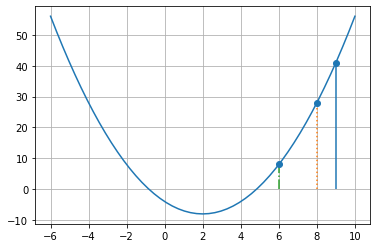

In [11]:
draw_iteration_bracketing(base_function,initial_bracket_results,3)

Coordinates of point a, blue: x:[8],y:[28.0000000000000]
Coordinates of point b, yellow: x:[6.0],y:[8.00000000000000]
Coordinates of point c, green: x:[2.0],y:[-8.00000000000000]


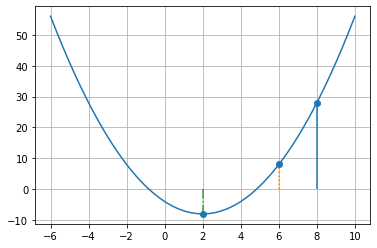

In [12]:
draw_iteration_bracketing(base_function,initial_bracket_results,4)

Coordinates of point a, blue: x:[6.0],y:[8.00000000000000]
Coordinates of point b, yellow: x:[2.0],y:[-8.00000000000000]
Coordinates of point c, green: x:[-6.0],y:[56.0000000000000]


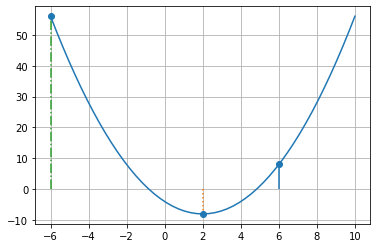

In [13]:
draw_iteration_bracketing(base_function,initial_bracket_results,5)

# Przeszukiwanie potrójne - ternary search

### Rozwiązanie odpowiednie dla funkcji unimodalnych (z jednym minimum)

In [14]:
def ternary_search(function,brackets,tol):
    
    points=np.zeros(4)
    lower=brackets[0][0]
    upper=brackets[1][0]
    
    f_lower=substitute_x(function,lower)
    f_upper=substitute_x(function,upper)
    
    while(abs(upper-lower)>2*tol):
        
        x1=(2*lower+upper)/3
        fx1=substitute_x(function,x1)
        x2=(lower+2*upper)/3
        fx2=substitute_x(function,x2)
        
        points=np.vstack([points,np.array([lower,x1,x2,upper])])
        
        if(fx1<fx2):
            upper=x2
            f_upper=fx2
            
        else:
            lower=x1
            f_lower=fx1
            
    optim_point=(upper+lower)/2
    return(optim_point,points[1:,:])

In [15]:
ternary_brackets=ternary_search(base_function,final_bracket,0.01)
ternary_brackets[0]

1.9983611295271486

In [16]:
def draw_iteration_ternary(function,result,n):
    vectorized_function=np.vectorize(substitute_x)
    z=np.linspace(np.min(result),np.max(result))
    w=vectorized_function(function,z)
    plt.plot(z, w)
    
    plt.stem([result[n-1][0]],[substitute_x(function,result[n-1][0])], use_line_collection=True,bottom=0,linefmt='C0-',markerfmt='C0o')
    plt.stem([result[n-1][1]],[substitute_x(function,result[n-1][1])], use_line_collection=True,bottom=0,linefmt='C1:',markerfmt='C1o')
    plt.stem([result[n-1][2]],[substitute_x(function,result[n-1][2])], use_line_collection=True,bottom=0,linefmt='C1:',markerfmt='C1o')
    plt.stem([result[n-1][3]],[substitute_x(function,result[n-1][3])], use_line_collection=True,bottom=0,linefmt='C0-',markerfmt='C0o')
    
    plt.grid()
    plt.show() 

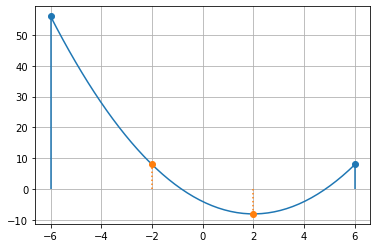

In [17]:
draw_iteration_ternary(base_function,ternary_brackets[1],1)

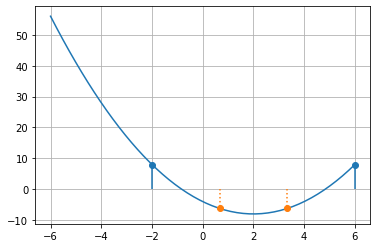

In [18]:
draw_iteration_ternary(base_function,ternary_brackets[1],2)

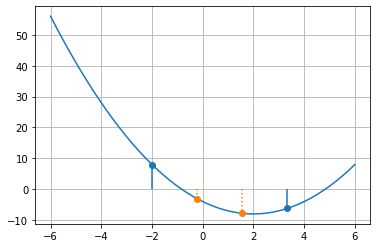

In [19]:
draw_iteration_ternary(base_function,ternary_brackets[1],3)

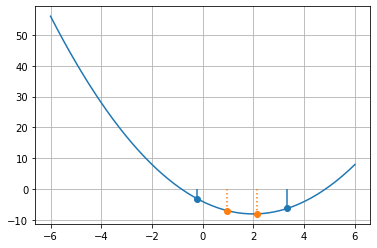

In [20]:
draw_iteration_ternary(base_function,ternary_brackets[1],4)

Podsumowanie metody:
1. W jednym kroku algorytmu badany przedział jest skracany o 1/3. 
2. W takim razie po n krokach procedury oryginalna długość przedziału zmniejszona jest $1,5^n$ razy.
3. W takiej sytuacji oszacowanie wartości funkcji f jest wywołane jest 2n razy.
4. Można więc powiedzieć, że jedno oszacowanie wartości funkcji pozwala średnio na
zmniejszenie długości przedziału $\sqrt(\frac{3}{2}) \approx 1.22$ razy.

# Metoda złotego podziału - Golden section search

### Rozwiązanie odpowiednie dla funkcji unimodalnych


In [21]:
def golden(function,brackets,tol):
    points=np.zeros(4)
    
    lower=brackets[0][0]
    upper=brackets[1][0]
    
    x1=(golden_ratio-1)*lower + (2-golden_ratio)*upper
    fx1=substitute_x(function,x1)
    
    while abs(upper-lower)>2*tol:
        x2=(2-golden_ratio)*lower + (golden_ratio-1)*upper
        fx2=substitute_x(function,x2) #only one f value calculation per loop
        
        points=np.vstack([points,np.array([lower,x1,x2,upper])])
        
        if(fx1<fx2):
            upper=lower
            lower=x2
        else:
            lower=x1
            x1=x2
            fx1=fx2
            
    points=np.vstack([points,np.array([lower,x1,x2,upper])])
    optim_point=((upper+lower)/2)
    return optim_point,points[1:,:]      

In [22]:
golden_result=golden(base_function,final_bracket,1e-1)

In [23]:
def draw_iteration_golden(function,result,n):
    vectorized_function=np.vectorize(substitute_x)
    z=np.linspace(np.min(result),np.max(result))
    w=vectorized_function(function,z)
    plt.plot(z, w)
    
    plt.stem([result[n-1][0]],[substitute_x(function,result[n-1][0])], use_line_collection=True,bottom=0,linefmt='C0-',markerfmt='C0o')
    plt.stem([result[n-1][1]],[substitute_x(function,result[n-1][1])], use_line_collection=True,bottom=0,linefmt='C1:',markerfmt='C1o')
    plt.stem([result[n-1][2]],[substitute_x(function,result[n-1][2])], use_line_collection=True,bottom=0,linefmt='C1:',markerfmt='C1o')
    plt.stem([result[n-1][3]],[substitute_x(function,result[n-1][3])], use_line_collection=True,bottom=0,linefmt='C0-',markerfmt='C0o')
    
    plt.grid()
    plt.show() 

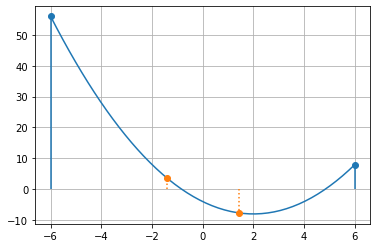

In [24]:
draw_iteration_golden(base_function,golden_result[1],1)

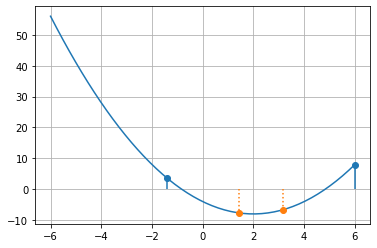

In [25]:
draw_iteration_golden(base_function,golden_result[1],2)

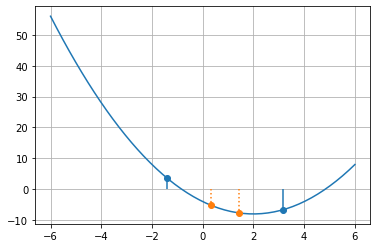

In [26]:
draw_iteration_golden(base_function,golden_result[1],3)

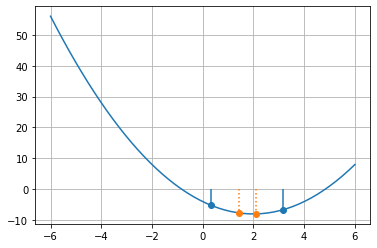

In [27]:
draw_iteration_golden(base_function,golden_result[1],4)

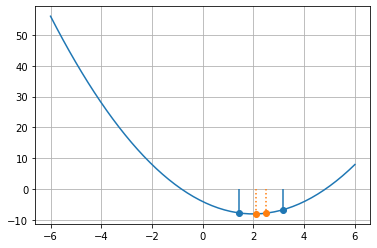

In [28]:
draw_iteration_golden(base_function,golden_result[1],5)

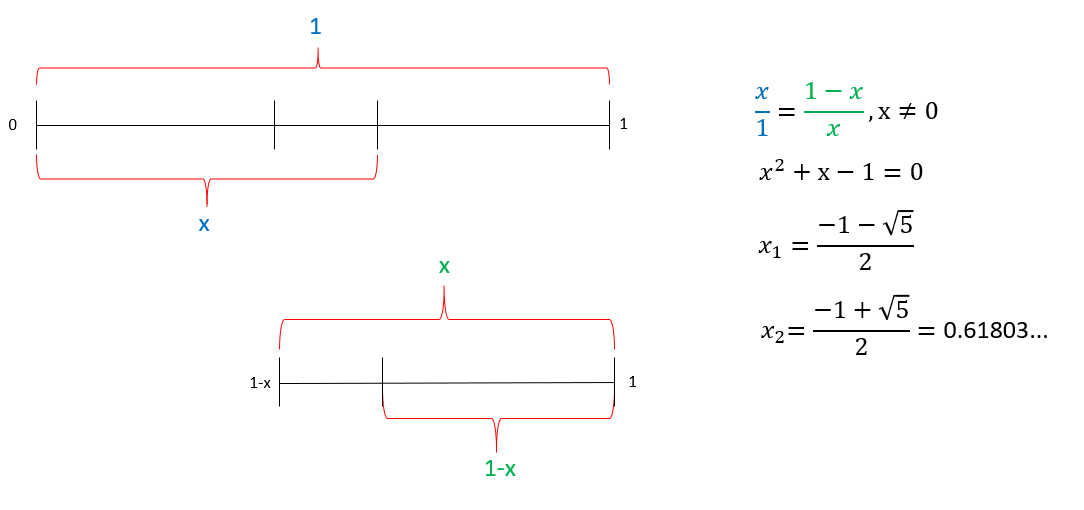

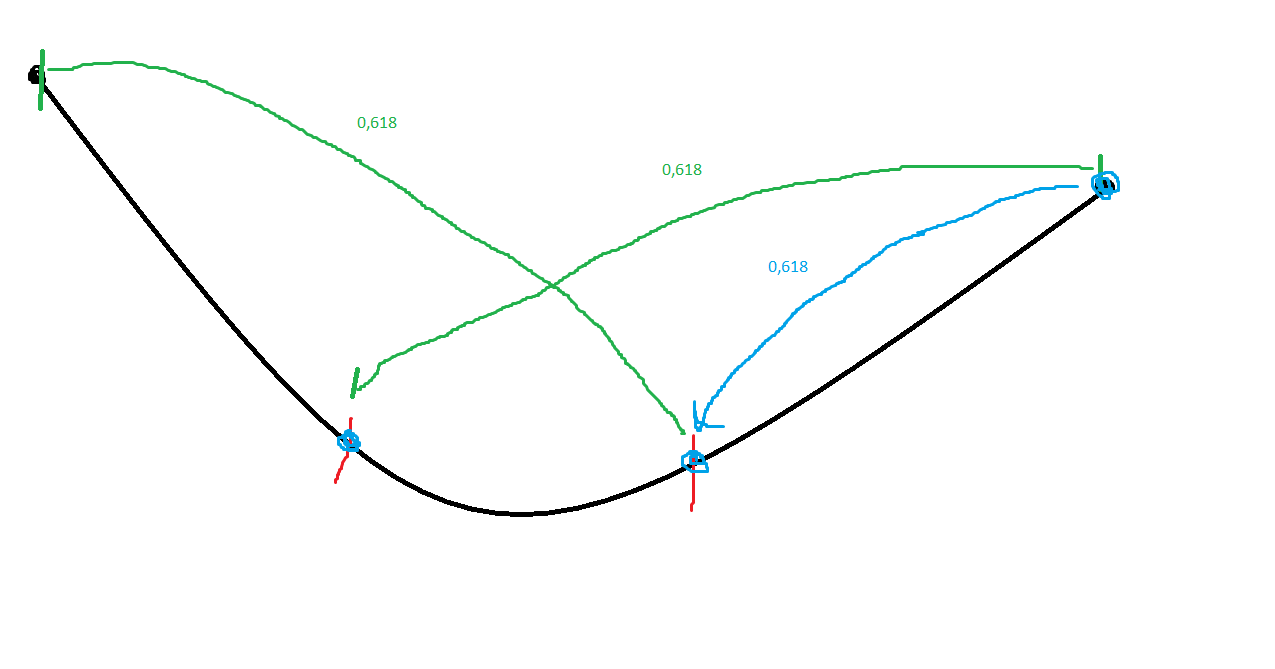

Podsumowanie metody:
1. Po n krokach procedury oryginalna długość przedziału zmniejszona jest $1,62^n$ razy.
2. Oszacowanie wartości funkcji $f$ jest wywołane jest $n$ razy.
3. Porównajmy szybkość przeszukiwania potrójnego z przeszukiwaniem według złotego podziału. Zauważmy, że $1,62 > 1,5$. W takim razie przeszukiwanie potrójne jest ponad dwa razy wolniejsze, ponieważ wymaga dwóch oszacowań wartości funkcji w każdym kroku. Na przykład w celu osiągnięcia skrócenia inicjalnego przedziału $1.5^{19} \approx 2217$ razy przeszukiwanie potrójne wymaga $19*2 = 38$ oszacowań wartości funkcji. Z kolei przeszukiwanie według złotego podziału dla osiągnięcia skrócenia przedziału $16*2207$ razy wymaga 16 oszacowań.

# Metoda bisekcji

Powyżej przedstawione metody wykorzystywały jedynie wartości funkcji do poszukiwania jej minimum lokalnego. Przejdźmy teraz do omówienia tzw. algorytmów gradientowych, które wykorzystują informację o pochodnych minimalizowanej funkcji f. W oczywisty sposób ograniczeniem tych metod jest konieczność spełnienia warunku różniczkowalności przez badaną funkcję.

In [29]:
def bisection(deriv_f,brackets,tol):
    points=np.zeros(3)
    
    lower=final_bracket[1][0]
    upper=final_bracket[0][0]
    
    while(upper-lower>2*tol):
        m=(lower+upper)/2
        points=np.vstack([points,np.array([lower,m,upper])])
        dfm=substitute_x(base_function_deriv,m)
        
        if(dfm<0):
            lower=m
        else:
            upper=m
    optim_point=(upper+lower)/2
    points=np.vstack([points,np.array([lower,m,upper])])
    return optim_point,points[1:,:]

In [30]:
bisection_result=bisection(base_function_deriv,final_bracket,1e-3)

In [31]:
def draw_iteration_bisection(function1,function2,result,n):
    vectorized_function=np.vectorize(substitute_x)
    z=np.linspace(np.min(result),np.max(result))
    w=vectorized_function(function1,z)
    v=vectorized_function(function2,z)
    plt.plot(z, w)
    plt.plot(z, v)
    
    plt.stem([result[n-1][0]],[substitute_x(function2,result[n-1][0])], use_line_collection=True,bottom=0,linefmt='C1:',markerfmt='C1o')
    plt.stem([result[n-1][1]],[substitute_x(function2,result[n-1][1])], use_line_collection=True,bottom=0,linefmt='C0-',markerfmt='C0o')
    plt.stem([result[n-1][2]],[substitute_x(function2,result[n-1][2])], use_line_collection=True,bottom=0,linefmt='C1:',markerfmt='C1o')
    
    plt.grid()
    plt.show() 

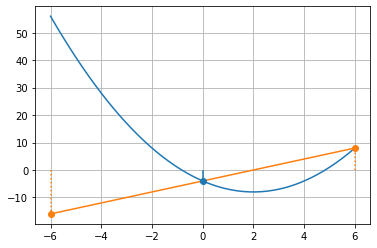

In [32]:
draw_iteration_bisection(base_function,base_function_deriv,bisection_result[1],1)

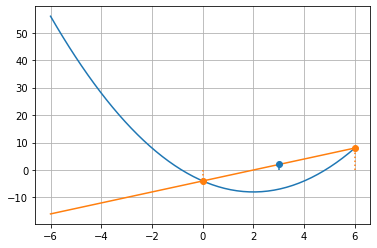

In [33]:
draw_iteration_bisection(base_function,base_function_deriv,bisection_result[1],2)

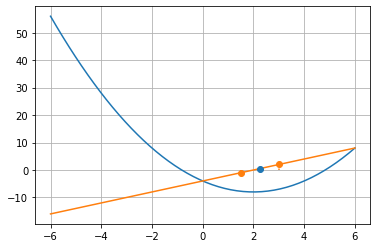

In [34]:
draw_iteration_bisection(base_function,base_function_deriv,bisection_result[1],4)

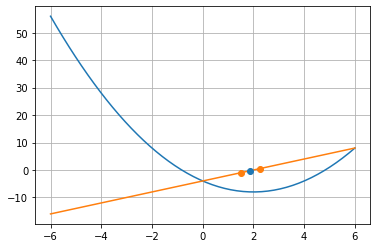

In [35]:
draw_iteration_bisection(base_function,base_function_deriv,bisection_result[1],5)

Warto zwrócić uwagę na fakt, że algorytm ten w każdym kroku dwukrotnie zmniejsza długość przeszukiwanego przedziału.
W związku z tym wydaje się on być szybszy niż algorytm złotego podziału.
Jednak jego praktyczna szybkość zależy od kosztu wyznaczenia wartości pochodnej  𝑓′(𝑥)  w punkcie w stosunku do kosztu wyliczenia wartości  𝑓(𝑥) .
Jeśli jest on porównywalny, to metoda bisekcji będzie bardziej efektywna. Z kolei jeżli np. pochodna jest wyznaczana numerycznie, co wymaga przynajmniej dwóch oszacowań funkcji f to metoda złotego podziału jest bardziej efektywna.

# Algorytm Newtona


Algorytm Newtona opiera się na analizie funkcji przybliżonej za pomocą wzoru Taylora. Ta aproksymacja pozwala nam na łatwe obliczeniowo znalezienie kroku h takiego aby pochodna tego przybliżenia w docelowym punkcie była równa zero. 

Możemy przedstawić nasz problem analogicznie jak w przypadku metody bisekcji - znalezienia miejsca w którym zeruje się pochodna. Naszą funkcję możemy przybliżyć do postaci:

$f(x+h)\approx f(x)+f'(x)*h+\frac{1}{2}f''(x)h^2$

Zauważmy że jest to funkcja kwadratowa, możemy zauważyć jej podobieństwo do postaci $f(h)=c+bh+ah^2$.
Funkcja kwadratowa takiej postaci posiada wierzchołek paraboli w punkcie $\frac{-b}{2a}$. Oznacza to że pochodna naszego przybliżenia będzie zerowa jeżeli zrobimy krok o długości $h=-\frac{f'(x)}{f''(x)}$. Z tego wiemy, że kolejny punkt, $x(k+1)$, powinien przyjąć wartość $x-\frac{f'(x)}{f''(x)}$

Minimum przybliżenia naszej funkcji staje się naszym kolejnym punktem do analizy. 

Warto zwrócić uwagę na fakt, że metoda ta podobnie jak algorytm bisekcji nie korzysta z informacji o wartości badanej funkcji. Punkt, którego poszukujemy to miejsce zerowe pochodnej funkcji f. W szczególności oznacza to, że zwrócona aproksymacja może przybliżać maksimum (jeśli druga pochodna jest ujemna) lub punkt przegięcia (druga pochodna równa 0) badanej funkcji. Z kolei zaletą algorytmu Newtona jest jego szybkość zbieżności.

In [36]:
base_function2 = sympify(-exp(-x**2))
base_function2_deriv = Derivative(base_function2,x).doit()
base_function2_deriv2 = Derivative(base_function2,x,2).doit()
starting_point=0.4
n_iters=100

In [37]:
def newton(df,d2f,x,tol,max_iters):
    points=np.zeros(2)
    counter=0
    
    while True:
        if(counter<max_iters):
            new_x=x-substitute_x(df,x)/substitute_x(d2f,x)
            points=np.vstack([points,np.array([x,new_x])])
            if(abs(new_x-x)<tol):
                result_newton=new_x
                return result_newton,points[1:,:]
            x=new_x
            counter+=1
        else:
            result_newton=new_x
            return result_newton,points[1:,:]

In [38]:
result_newton=newton(base_function2_deriv,base_function2_deriv2,starting_point,1e-3,n_iters)

In [39]:
def draw_iteration_newton(function1,result,n):
    taylor_approx=series(base_function2, x0=result[n-1][0], n=3).removeO()
    evalfunc = lambdify(x, function1, modules=['numpy'])
    evaltaylor = lambdify(x, taylor_approx, modules=['numpy'])
    z=np.linspace(min(-1.5,float(min(result[n-1][0],result[n-1][1]))),float(max(1.5,max(result[n-1][0],result[n-1][1]))))
    plt.plot(z, evalfunc(z))
    plt.plot(z, evaltaylor(z))
    
    plt.stem([result[n-1][0]],[substitute_x(taylor_approx,result[n-1][0])], use_line_collection=True,bottom=0,linefmt='C1:',markerfmt='C1o')
    plt.stem([result[n-1][1]],[substitute_x(taylor_approx,result[n-1][1])], use_line_collection=True,bottom=0,linefmt='C0-',markerfmt='C0o')

    plt.grid()
    plt.show() 

### Przypadek 1, zbieżny

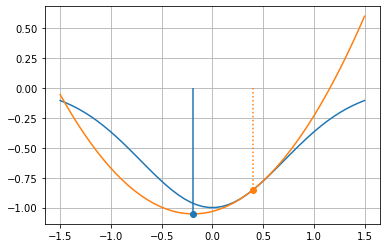

In [40]:
draw_iteration_newton(base_function2,result_newton[1],1)

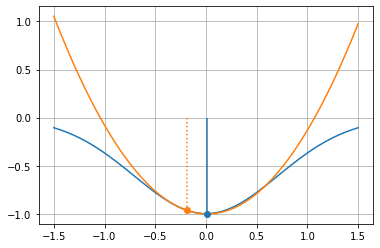

In [41]:
draw_iteration_newton(base_function2,result_newton[1],2)

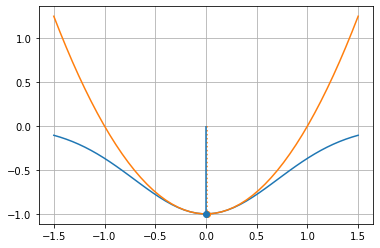

In [42]:
draw_iteration_newton(base_function2,result_newton[1],3)

### Przypadek 2, nieskończona pętla

In [43]:
result_newton=newton(base_function2_deriv,base_function2_deriv2,0.5,1e-3,n_iters)

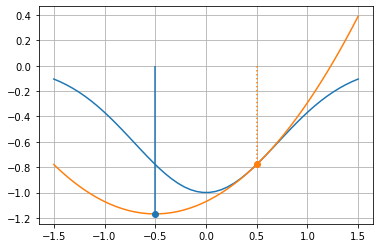

In [44]:
draw_iteration_newton(base_function2,result_newton[1],1)

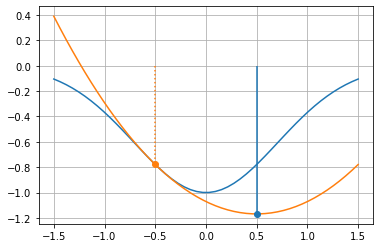

In [45]:
draw_iteration_newton(base_function2,result_newton[1],2)

### Przypadek 3, rozbieżny

In [46]:
result_newton=newton(base_function2_deriv,base_function2_deriv2,0.55,1e-3,n_iters)

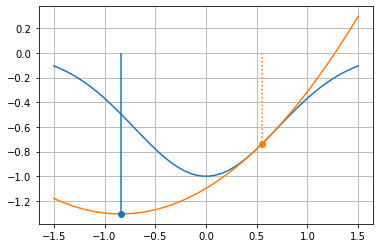

In [47]:
draw_iteration_newton(base_function2,result_newton[1],1)

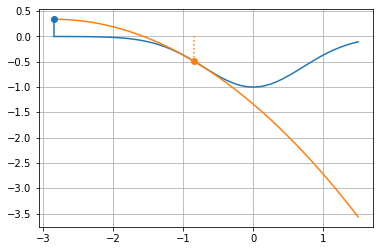

In [48]:
draw_iteration_newton(base_function2,result_newton[1],2)

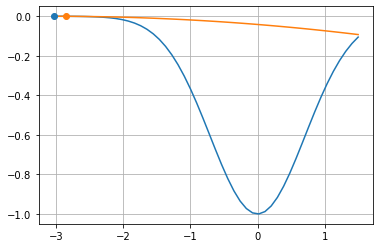

In [49]:
draw_iteration_newton(base_function2,result_newton[1],3)

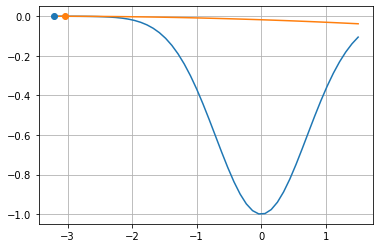

In [50]:
draw_iteration_newton(base_function2,result_newton[1],4)

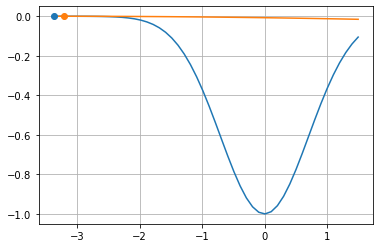

In [51]:
draw_iteration_newton(base_function2,result_newton[1],5)

# Metoda siecznych / secant method

Metoda siecznych pozwala na uniknięcie konieczności wyznaczania drugiej pochodnej funkcji. Metoda siecznych ma na celu wyeliminowanie w równaniu $x(k+1) = x(k)-\frac{f'(x(k))}{f''(x(k))}$ konieczności wyznaczania wartości $f''(x(k))$. Jeżeli dysponujemy dwoma punktami oraz wartościami pochodnej minimalizowanej funkcji w tych punktach,
$f''(x(k))$ można przybliżyć za pomocą współczynnika kierunkowego siecznej przechodzącej przez oba punkty.
Wtedy $f''(x)\approx\frac{f'(x(k))-f'(x(k-1))}{x(k)-x(k-1)}$, a krok $h$ wynosi $-f'(x(k))*\frac{x(k)-x(k-1)}{f'(x(k))-f'(x(k-1))}$ <br>
<br>
Zwróćmy uwagę, że kod wykorzystuje tylko pierwszą pochodną funkcji w procesie optymalizacji. Z drugiej strony w celu rozpoczęcia optymalizacji niezbędne jest podanie dwóch punktów startowych. Zwróćmy uwagę, że metoda siecznych charakteryzuje się podobnymi problemami ze zbieżnością jak metoda Newtona.

In [52]:
def secant(df,x1,x2,tol):
    points=np.zeros(3)
    dfx2=substitute_x(df,x2)
    while True:
        dfx1=substitute_x(df,x1)
        new_x=x1-dfx1*(x1-x2)/(dfx1-dfx2)
        points=np.vstack([points,np.array([x1,x2,new_x])])
        if abs(new_x-x1)<tol:
            return new_x,points[1:,:]
        x2=x1
        dfx2=dfx1
        x1=new_x

In [53]:
def draw_iteration_secant(function1,function2,result,n):
    
    def line_2_pts(x):
        x_1=result[n-1][0]
        x_2=result[n-1][1]
        y_1=substitute_x(base_function2_deriv,result[n-1][0])
        y_2=substitute_x(base_function2_deriv,result[n-1][1])
        slope=(y_2-y_1)/(x_2-x_1)
        return slope*(x-x_1)+y_1
    
    evalfunc = lambdify(x, function1, modules=['numpy'])
    evalderiv = lambdify(x, function2, modules=['numpy'])
    
    z=np.linspace(min(-1.5,float(min(result[n-1][0],result[n-1][1],result[n-1][2]))),float(max(1.5,max(result[n-1][0],result[n-1][1],result[n-1][2]))))
    plt.plot(z, evalfunc(z))
    plt.plot(z, evalderiv(z))
    plt.plot(z, line_2_pts(z))
    
    plt.stem([result[n-1][0]],[substitute_x(base_function2_deriv,result[n-1][0])], use_line_collection=True,bottom=0,linefmt='C0:',markerfmt='C0o')
    plt.stem([result[n-1][1]],[substitute_x(base_function2_deriv,result[n-1][1])], use_line_collection=True,bottom=0,linefmt='C0:',markerfmt='C0o')
    plt.stem([result[n-1][2]],[substitute_x(base_function2_deriv,result[n-1][2])], use_line_collection=True,bottom=0,linefmt='C1:',markerfmt='C1o')
    
    plt.grid()
    plt.show() 

#### Przypadek zbieżny

In [54]:
result_secant=secant(base_function2_deriv,0.5,0.6,0.01)

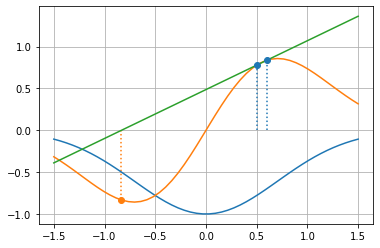

In [55]:
draw_iteration_secant(base_function2,base_function2_deriv,result_secant[1],1)

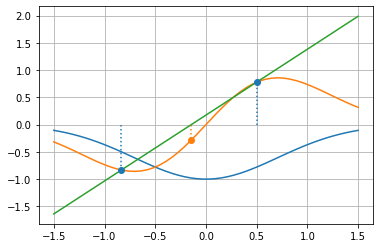

In [56]:
draw_iteration_secant(base_function2,base_function2_deriv,result_secant[1],2)

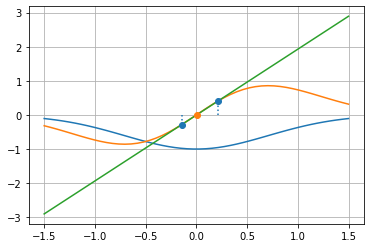

In [57]:
draw_iteration_secant(base_function2,base_function2_deriv,result_secant[1],4)

#### Przypadek rozbieżny

In [58]:
result_secant=secant(base_function2_deriv,0.85,0.9,0.01)

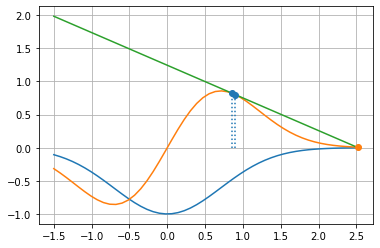

In [59]:
draw_iteration_secant(base_function2,base_function2_deriv,result_secant[1],1)

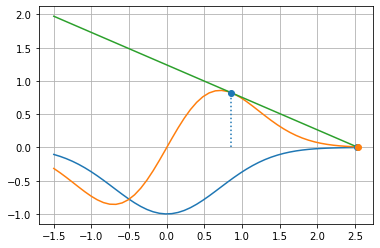

In [60]:
draw_iteration_secant(base_function2,base_function2_deriv,result_secant[1],2)

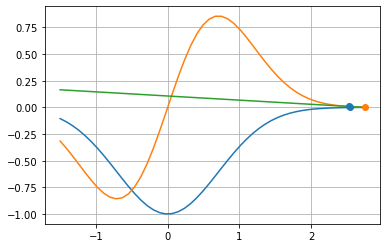

In [61]:
draw_iteration_secant(base_function2,base_function2_deriv,result_secant[1],3)